24th
Gradient Vs Adam

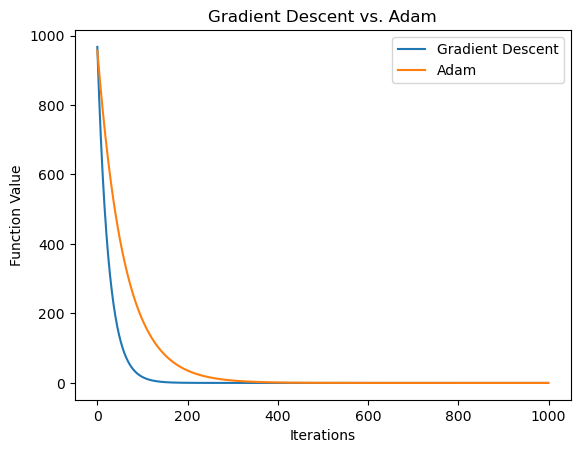

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its gradient
def f(x):
    return np.sum(x ** 2)

def grad_f(x):
    return 2 * x

# Gradient Descent Implementation
def gradient_descent(lr=0.01, steps=1000, dim=1000):
    x = np.random.randn(dim)  # Initialize randomly
    history = []
    for _ in range(steps):
        x -= lr * grad_f(x)
        history.append(f(x))
    return history

# Adam Implementation
def adam(lr=0.01, steps=1000, dim=1000, beta1=0.9, beta2=0.999, eps=1e-8):
    x = np.random.randn(dim)  # Initialize randomly
    m, v = np.zeros(dim), np.zeros(dim)
    history = []
    for t in range(1, steps + 1):
        g = grad_f(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        x -= lr * m_hat / (np.sqrt(v_hat) + eps)
        history.append(f(x))
    return history

# Run experiments
gd_history = gradient_descent()
adam_history = adam()

# Plot results
plt.plot(gd_history, label='Gradient Descent')
plt.plot(adam_history, label='Adam')
plt.xlabel('Iterations')
plt.ylabel('Function Value')
plt.legend()
plt.title('Gradient Descent vs. Adam')
plt.show()